# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 199s 1us/step


In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

# Image normalize 

In [8]:

import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, idx, prediction=None, num=10):
    fig = plt.figure(figsize=(12, 14))
    if num > 25:
        num = 25 
    for i in range(idx, idx+num):
        ax = plt.subplot(5, 5, i - idx + 1)
        ax.imshow(images[i], cmap='binary')
        
        title = f"idx={i}, label={labels[i][0]}"
        if prediction is not None:
            title += f" => {prediction[i]}"
            
        ax.set_title(title, fontsize=10) 
        ax.set_xticks([])
        ax.set_yticks([])        
    plt.show()

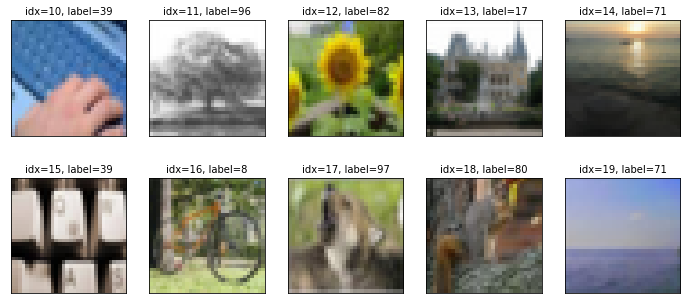

In [9]:
plot_images_labels_prediction(x_img_train, y_label_train, 10)

# 轉換label 為OneHot Encoding

In [10]:
x_train_normalize = x_img_train.astype('float32') / 255.0
x_test_normalize = x_img_test.astype('float32') / 255.0

In [11]:
x_img_train[0][0][0], x_train_normalize[0][0][0]

(array([255, 255, 255], dtype=uint8), array([1., 1., 1.], dtype=float32))

In [12]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [13]:
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_label_train)
y_test_OneHot = np_utils.to_categorical(y_label_test)
y_train_OneHot.shape, y_test_OneHot.shape

((50000, 100), (10000, 100))